In [1]:
import pandas as pd

In [2]:
from sqlite3 import connect

In [3]:
opsim_db = connect('six_rolling_ns6_rw0.9_v2.0_10yrs.db')

In [4]:
opsim_file = pd.read_sql('select * from observations limit 1000', opsim_db)

In [5]:
opsim_file.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase', 'cummTelAz'],
      dtype='object')

In [6]:
'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'fieldId', 'filter', 'fiveSigmaDepth'

('observationId',
 'fieldRA',
 'fieldDec',
 'observationStartMJD',
 'fieldId',
 'filter',
 'fiveSigmaDepth')

In [7]:
band_obs = pd.read_sql_query('SELECT observationId, fieldRA, fieldDec, observationStartMJD, fieldId, filter, fiveSigmaDepth FROM observations', opsim_db)

In [8]:
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth
0,0,310.024480,-60.812928,60218.001806,-1,y,22.370557
1,1,310.601871,-63.561425,60218.002254,-1,y,22.338327
2,2,311.292611,-66.317774,60218.002703,-1,y,22.295487
3,3,312.140731,-69.082666,60218.003152,-1,y,21.270421
4,4,304.170163,-73.375442,60218.003624,-1,y,21.205276
...,...,...,...,...,...,...,...
2089605,2089605,354.817466,-6.148237,63870.104433,-1,r,23.595226
2089606,2089606,352.219896,-4.765672,63870.104882,-1,r,23.543322
2089607,2089607,349.652730,-3.373581,63870.105332,-1,r,23.546577
2089608,2089608,349.436937,-6.336565,63870.105781,-1,r,23.574426


In [9]:
import matplotlib.pyplot as plt
%matplotlib Inline

Text(0, 0.5, 'DEC')

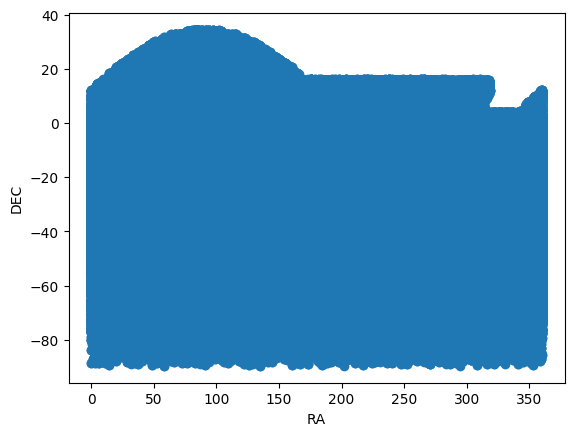

In [10]:
plt.scatter(band_obs['fieldRA'], band_obs['fieldDec'])
plt.xlabel('RA')
plt.ylabel('DEC')

In [11]:
import matplotlib as npl

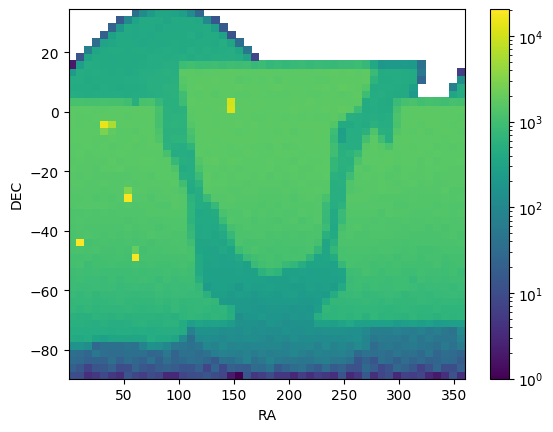

In [12]:
plt.hist2d(band_obs['fieldRA'], band_obs['fieldDec'], bins = 50, norm=npl.colors.LogNorm())
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

In [13]:
import numpy as np

In [14]:
find_max_RA = np.max(band_obs['fieldRA'])
find_min_RA = np.min(band_obs['fieldRA'])
find_max_DEC = np.max(band_obs['fieldDec'])
find_min_DEC = np.min(band_obs['fieldDec'])
num_bins = 50

In [15]:
RA_set = np.linspace(find_min_RA, find_max_RA, num_bins)
DEC_set = np.linspace(find_min_DEC, find_max_DEC, num_bins)


In [16]:
RA_set, DEC_set


(array([8.05970830e-04, 7.34772588e+00, 1.46946458e+01, 2.20415657e+01,
        2.93884856e+01, 3.67354055e+01, 4.40823254e+01, 5.14292453e+01,
        5.87761652e+01, 6.61230851e+01, 7.34700050e+01, 8.08169249e+01,
        8.81638448e+01, 9.55107647e+01, 1.02857685e+02, 1.10204605e+02,
        1.17551524e+02, 1.24898444e+02, 1.32245364e+02, 1.39592284e+02,
        1.46939204e+02, 1.54286124e+02, 1.61633044e+02, 1.68979964e+02,
        1.76326884e+02, 1.83673804e+02, 1.91020724e+02, 1.98367643e+02,
        2.05714563e+02, 2.13061483e+02, 2.20408403e+02, 2.27755323e+02,
        2.35102243e+02, 2.42449163e+02, 2.49796083e+02, 2.57143003e+02,
        2.64489923e+02, 2.71836842e+02, 2.79183762e+02, 2.86530682e+02,
        2.93877602e+02, 3.01224522e+02, 3.08571442e+02, 3.15918362e+02,
        3.23265282e+02, 3.30612202e+02, 3.37959122e+02, 3.45306042e+02,
        3.52652961e+02, 3.59999881e+02]),
 array([-89.6674824 , -87.13421278, -84.60094315, -82.06767353,
        -79.53440391, -77.0011

In [17]:
DEC_set[11]

-61.801516552488266

In [18]:
RA_bins = np.digitize(band_obs['fieldRA'], RA_set, right=True)
RA_bins

array([43, 43, 43, ..., 48, 48, 47])

In [19]:
np.searchsorted(RA_set, band_obs['fieldRA'])

array([43, 43, 43, ..., 48, 48, 47])

In [20]:
DEC_bins = np.digitize(band_obs['fieldDec'], DEC_set, right=True)
DEC_bins

array([12, 11, 10, ..., 35, 33, 33])

In [21]:
band_obs['RABins'] = RA_bins
band_obs['DECBins'] = DEC_bins

In [22]:
len(DEC_set)

50

In [23]:
new_field_id = (RA_bins) * 50 + DEC_bins
band_obs['fieldId'] = new_field_id
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
0,0,310.024480,-60.812928,60218.001806,2162,y,22.370557,43,12
1,1,310.601871,-63.561425,60218.002254,2161,y,22.338327,43,11
2,2,311.292611,-66.317774,60218.002703,2160,y,22.295487,43,10
3,3,312.140731,-69.082666,60218.003152,2159,y,21.270421,43,9
4,4,304.170163,-73.375442,60218.003624,2107,y,21.205276,42,7
...,...,...,...,...,...,...,...,...,...
2089605,2089605,354.817466,-6.148237,63870.104433,2483,r,23.595226,49,33
2089606,2089606,352.219896,-4.765672,63870.104882,2434,r,23.543322,48,34
2089607,2089607,349.652730,-3.373581,63870.105332,2435,r,23.546577,48,35
2089608,2089608,349.436937,-6.336565,63870.105781,2433,r,23.574426,48,33


In [24]:
band_obs.query(f'fieldId == 0')

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins


In [25]:
r_filter = band_obs.query(f'fieldId == 2403 and filter == "r"')
g_filter = band_obs.query(f'fieldId == 2403 and filter == "g"')
print(r_filter, g_filter)
field_id_max = np.max(band_obs['fieldId'])
#field_id_min = np.min(band_obs['fieldId'])
print(field_id_max)

         observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
772                772  349.857034 -82.633511         60218.357890     2403   
1261038        1261038  345.384441 -82.527359         62437.195122     2403   
1264462        1264462  351.795196 -83.451359         62442.298571     2403   
1680493        1680493  352.335555 -82.439248         63153.048912     2403   
1973907        1973907  349.930928 -84.257032         63681.200372     2403   

        filter  fiveSigmaDepth  RABins  DECBins  
772          r       22.115278      48        3  
1261038      r       23.151012      48        3  
1264462      r       22.481434      48        3  
1680493      r       23.503091      48        3  
1973907      r       23.698621      48        3            observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
6825              6825  352.165162 -82.198183         60226.356411     2403   
28350            28350  351.779549 -83.371761         60264.075531 

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = 'data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [27]:
fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = 'data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [28]:
import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed

In [29]:
sun = Sed()
sun.readSED_flambda('data/sed_templates/CWW_KINNEY/CWW_E_ext.sed')
sun.wavelen/=10

In [30]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']

lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].readThroughput(os.path.join(fdir, f'total_{f}.dat'))
    
mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])

# Make a dataframe just to get a nice output cell.
pd.DataFrame(mags, index=['Sun']).T

,Sun
u,-4.150003
g,-5.896804
r,-6.622219
i,-6.974888
z,-7.233845
y,-7.425142


In [31]:
r = 20.0

fluxNorm = sun.calcFluxNorm(r, lsst['r'])

sun.multiplyFluxNorm(fluxNorm)

mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])
    
pd.DataFrame(mags, index=['Distant Sun']).T

,Distant Sun
u,22.472216
g,20.725415
r,20.000000
i,19.647330
z,19.388374
y,19.197076


In [32]:
from rubin_sim.photUtils import SignalToNoise
from rubin_sim.photUtils import PhotometricParameters

In [33]:
SignalToNoise.calcMagError_m5(magnitude=20, bandpass=lsst['r'], m5=24, photParams=PhotometricParameters())
SignalToNoise.calcMagError_m5(magnitude=20.725415, bandpass=lsst['g'], m5=24, photParams=PhotometricParameters())

(0.013139422508835895, 0.03934261437469505)

In [34]:
mag_error_r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 22.115278, PhotometricParameters())
mag_error_2r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 23.833470, PhotometricParameters())
print(mag_error_r)
print(mag_error_2r)

0.031221444804164934
0.009322245115585407


In [35]:
mag_error_g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 23.803613 , PhotometricParameters())
mag_error_2g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 24.005959, PhotometricParameters())
print(mag_error_g, mag_error_2g)

0.014857161547721024 0.013093479367888855


In [36]:
mag_2 = 20
mag_1 = 20.725415
def combine_col_err(mag_1, mag_2, err_1, err_2):
    return mag_1-mag_2, np.sqrt(mag_error_g**2 + mag_error_r**2)

In [37]:
gmr_error = combine_col_err(mag_1, mag_2, mag_error_g, mag_error_r)

In [38]:
gmr_error


(0.7254150000000017, 0.0345762037377529)

In [39]:
from scipy.stats import norm

In [40]:
from copy import copy
g_r = []
g_r_err = []
pdf_list = []
r = 24.5
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    gr_color = mags['g'] - mags['r']
    g_r.append(mags['g'] - mags['r'])
    result_g = 1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth'])))
    result_r = 1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth'])))
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], result_g , PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], result_r, PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
    gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
    pdf_list.append(norm(loc = gr_color, scale = gr_error))
    

print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.127568839165825, 2.2677011843884642, 2.1867075250048273, 1.8528072436778764, 1.4936730257263982, 1.1240496109998404, 0.8557468597614317, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.7750666481098385, 0.7663830025511693, 0.7227059844917534, 0.6590263915621257, 0.5962345500838815, 0.5445307149382153, 0.508888128898807, 0.4915751575070537, 0.4913180779593205, 0.5034478075371531, 0.5257928424279541, 0.5554684677789687] [0.35687016796667004, 0.3828663348226177, 0.43957592453420996, 0.5123201639483278, 0.580762139511879, 0.5459368579135112, 0.5280070203236369, 0.5479036602364147, 0.632544161433438, 0.731091259348676, 0.7939741370041833, 0.7570245265893062, 0.6221511163288246, 0.5077449281410277, 0.42073163249455237, 0.37472119946564525, 0.3561660771719741, 0.354890248239604, 0.3597410477640111, 0.36335

In [41]:
# g_r_err on x-axis, g_r on y-axis

Text(0, 0.5, 'Color')

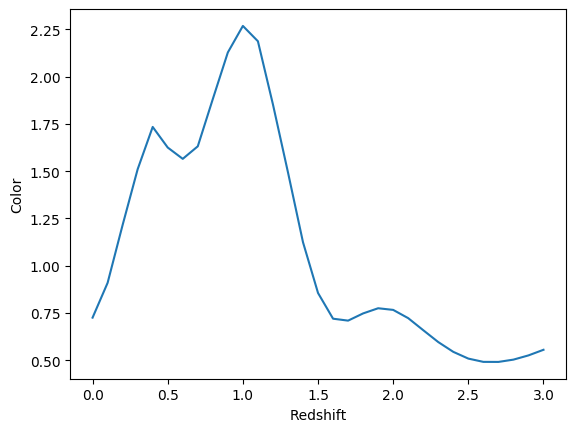

In [42]:
redshift_r = np.arange(0,3.1,0.1)
plt.plot(redshift_r, g_r)
plt.xlabel("Redshift")
plt.ylabel("Color")

In [43]:
g_r[0], g_r_err[0]

(0.7254152168005632, 0.35687016796667004)

In [44]:
gal_z_0 = norm(loc=g_r[0], scale=g_r_err[0])
gal_z_0p5 = norm(loc=g_r[5], scale=g_r_err[5])
gal_z_1p0 = norm(loc=g_r[10], scale=g_r_err[10])

In [45]:
np.min(g_r), np.max(g_r)

(0.4913180779593205, 2.2677011843884642)

In [46]:
color_range = np.arange(-4,8, 0.01)

In [77]:
len(color_range)

1200

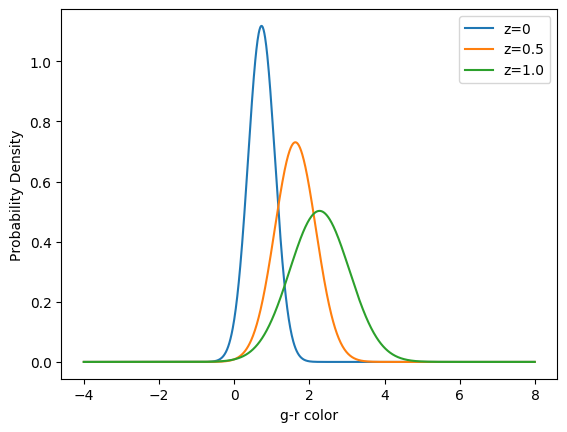

In [47]:
plt.plot(color_range, pdf_list[0].pdf(color_range), label = 'z=0')
plt.plot(color_range, pdf_list[5].pdf(color_range), label = 'z=0.5')
plt.plot(color_range, pdf_list[10].pdf(color_range), label = 'z=1.0')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [48]:
#combined_pdf = gal_z_0.pdf(color_range) + gal_z_0p5.pdf(color_range) +  gal_z_1p0.pdf(color_range)
combined_pdf = np.zeros(len(color_range))

In [49]:
for gal in pdf_list:
    combined_pdf += gal.pdf(color_range)
combined_pdf_2 = combined_pdf / len(pdf_list)  

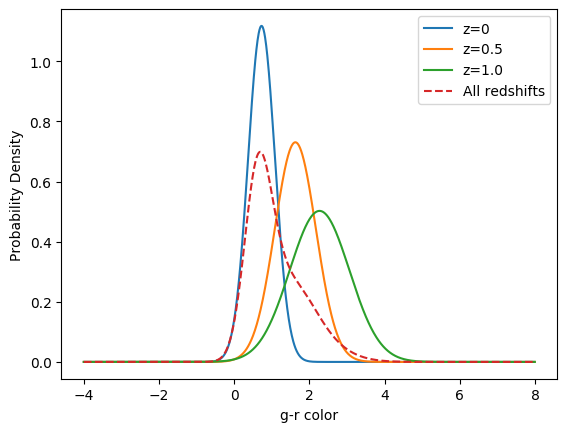

In [50]:
plt.plot(color_range, gal_z_0.pdf(color_range), label = 'z=0')
plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf_2 , '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [51]:
from scipy.special import kl_div, rel_entr

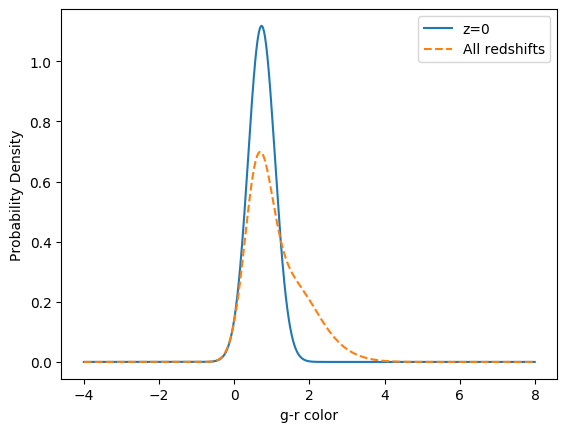

In [52]:
plt.plot(color_range, gal_z_0.pdf(color_range), label = 'z=0')
#plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
#plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf_2, '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [53]:
np.sum(0.01*gal_z_0.pdf(color_range)*0.01)

0.010000000000000215

In [54]:
np.sum(kl_div(0.01*gal_z_0.pdf(color_range), 0.01*combined_pdf_2))

0.28219129337604465

In [55]:
combined_kl = []
for gal in pdf_list:
    combined_kl.append(np.sum(kl_div(0.01*gal.pdf(color_range), 0.01*combined_pdf_2)))

In [56]:
print(np.mean(combined_kl))

0.4503634926556732


In [57]:
result_r = 1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth'])))

In [58]:
result_g = 1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth'])))

In [59]:
print(result_r, result_g)

24.132192596635498 25.012170083275326


In [60]:
def calc_colors_pdf(r_filter, g_filter):
    g_r = []
    g_r_err = []
    pdf_list = []
    r = 24.5
    for redshift in np.arange(0,3.1,0.1):
        sun_copy = copy(sun)
        sun_copy.redshiftSED(redshift)
        mags = {}
        fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
        sun_copy.multiplyFluxNorm(fluxNorm)
        mags = {}
        for f in filterlist:
            mags[f] = sun_copy.calcMag(lsst[f])
            pd.DataFrame(mags, index=['Distant Sun']).T
        gr_color = mags['g'] - mags['r']
        g_r.append(mags['g'] - mags['r'])
        result_g = 1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth'])))
        result_r = 1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth'])))
        mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], result_g , PhotometricParameters())
        mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], result_r, PhotometricParameters())
        g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
        gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
        pdf_list.append(norm(loc = gr_color, scale = gr_error))
    return g_r, g_r_err, pdf_list

In [61]:
def combined_pdfs(pdf_list_1, color_range_1):
    combined_pdf = np.zeros(len(color_range_1))
    for gal in pdf_list_1:
        combined_pdf += gal.pdf(color_range_1)
    combined_pdf_2 = combined_pdf / len(pdf_list_1) 
    return combined_pdf_2

In [62]:
#max_sig = np.max(band_obs['fiveSigmaDepth']                 
#def combined_sigma(r_filter, g_filter):
 #   result_r = 1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth']))) 
  #  result_g = 1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth'])))
   # return result_r, result_g
    
    # IGNORE

In [63]:
def combined_kl_div(combined_pdf_2, color_range, pdf_list):
    combined_kl = []
    for gal in pdf_list:
        check = kl_div(0.01*gal.pdf(color_range), 0.01*combined_pdf_2)
        if np.inf in check:
            check_ind = np.where(check == np.inf)
            check[check_ind] = 0
        combined_kl.append(np.sum(check))
    return combined_kl

In [64]:
color_range_1 = np.arange(-4,8, 0.01)
field_kl = []
for fid in range(0,field_id_max+1):
    if fid % 100 == 0:
        print(fid)
    r_filter = band_obs.query(f'fieldId == {fid} and filter == "r"')
    g_filter = band_obs.query(f'fieldId == {fid} and filter == "g"')
    if len(r_filter) == 0:
        field_kl.append([])
        continue
    if len(g_filter) == 0:
        field_kl.append([])
        continue
    g_r, g_r_err, pdf_list_1 = calc_colors_pdf(r_filter, g_filter)
    combined_pdf_2 = combined_pdfs(pdf_list_1, color_range_1)
    combined_kl = combined_kl_div(combined_pdf_2, color_range_1, pdf_list_1)
    field_kl.append(combined_kl)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [65]:
np.max(band_obs['fieldId'])

2491

In [66]:
import pickle

In [67]:
with open('presto_kl_field_values.pkl', 'wb') as f:
    pickle.dump(field_kl, f)

In [68]:
with open('presto_kl_field_values.pkl', 'rb') as f:
    field_kl = pickle.load(f)

In [69]:
iters = 0
ra_dec_kl = []
for RA in RA_set:
    for DEC in DEC_set:
        mean_kl = np.mean(field_kl[iters])
        ra_dec_kl.append([RA, DEC, mean_kl, iters])
        iters += 1    

/astro/users/brycek/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/astro/users/brycek/.local/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: list index out of range

In [70]:
np.max(RA_bins), np.max(DEC_bins)

(49, 49)

In [71]:
print(iters)

2492


In [72]:
ra_dec_kl[:10]

[[0.0008059708297653887, -89.66748239927435, nan, 0],
 [0.0008059708297653887, -87.13421277683925, nan, 1],
 [0.0008059708297653887, -84.60094315440415, nan, 2],
 [0.0008059708297653887, -82.06767353196905, nan, 3],
 [0.0008059708297653887, -79.53440390953395, nan, 4],
 [0.0008059708297653887, -77.00113428709886, nan, 5],
 [0.0008059708297653887, -74.46786466466375, nan, 6],
 [0.0008059708297653887, -71.93459504222866, nan, 7],
 [0.0008059708297653887, -69.40132541979357, nan, 8],
 [0.0008059708297653887, -66.86805579735847, nan, 9]]

In [73]:
my_array = np.array(ra_dec_kl)
my_array = my_array.T
my_array

array([[ 8.05970830e-04,  8.05970830e-04,  8.05970830e-04, ...,
         3.59999881e+02,  3.59999881e+02,  3.59999881e+02],
       [-8.96674824e+01, -8.71342128e+01, -8.46009432e+01, ...,
         9.13003288e+00,  1.16633025e+01,  1.41965721e+01],
       [            nan,             nan,             nan, ...,
         1.37112842e+00,  1.13076154e+00,  4.93576906e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         2.48900000e+03,  2.49000000e+03,  2.49100000e+03]])

In [90]:
# Saved baseline values to text with the following command:
# np.savetxt('baseline_kl_vals.txt', my_array[2])
# Now we can load them with:

baseline_kl_vals = np.loadtxt('baseline_kl_vals.txt')

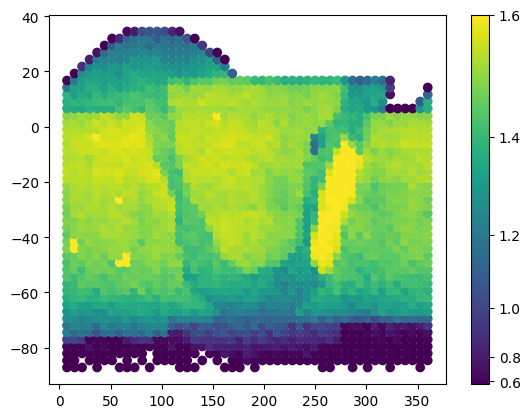

In [89]:
ax = plt.scatter(my_array[0], my_array[1], 
                 c=my_array[2], norm=npl.colors.PowerNorm(2))
#cbar = ax.colorbar()
ax.set_clim((0.5, 1.6))
plt.colorbar()

Text(0.5, 1.0, '"Rolling Six" KL Field Values compared to Baseline')

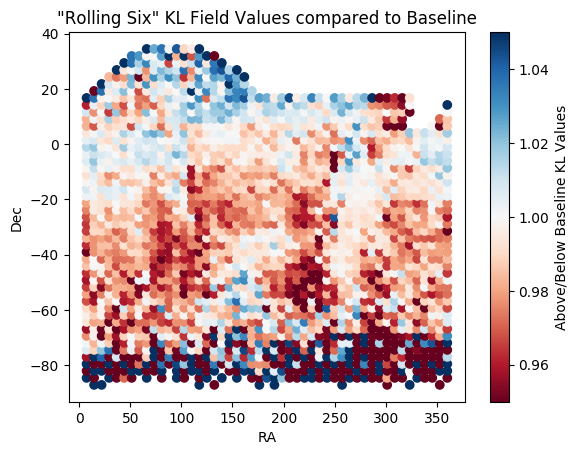

In [101]:
ax = plt.scatter(my_array[0], my_array[1], 
                 c=my_array[2]/baseline_kl_vals, cmap=plt.get_cmap('RdBu'))
#cbar = ax.colorbar()
ax.set_clim(0.95, 1.05)
cbar = plt.colorbar()
cbar.set_label('Above/Below Baseline KL Values')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('"Rolling Six" KL Field Values compared to Baseline')

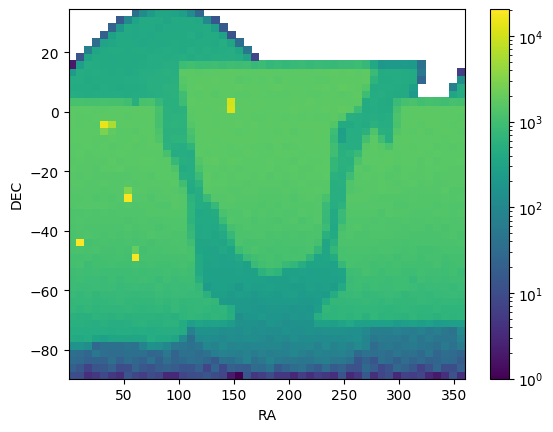

In [75]:
plt.hist2d(band_obs['fieldRA'], band_obs['fieldDec'], bins = 50, norm=npl.colors.LogNorm())
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

In [76]:
print(np.nanmedian(my_array[2]), np.nanmean(my_array[2]))

1.4520681970447722 1.3264842834546553
